# Бизнес-понимание

Заказчик занимается сборкой и продажей ПК и планирует выйти на новый для него онлайн-рынок. Бизнес-цель заказчика заключается в привлечении большего числа клиентов и повышении числа продаж при одновременном сокращении расходов на содержание магазина, доставку и рекламу.

# Подготовка данных

## Подготовка среды

Для начала работы необходимо импортировать все необходимые библиотеки для анализа данных и вычисления.

In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scps 
import seaborn as sns

Подгружаем дата-сет, предоставленный специалистом по подбору данных.

In [2]:
url = 'https://drive.google.com/uc?id=1lRHPpoX8PaxcoUDeSMN-smJA5NTCREbM'
df = pd.read_csv(url)

## Обзор файла

In [3]:
table_width = 50
print('+' + '-'*table_width + '+')
print('|' + f'{"Вывод первых строк базы":^{table_width}}' + '|')
print('+' + '-'*table_width + '+', end='\n\n')

print(df.head())


print('\n\n+' + '-'*table_width + '+')
print('|' + f'{"Вывод последних строк базы":^{table_width}}' + '|')
print('+' + '-'*table_width + '+', end='\n\n')

print(df.tail())


print('\n\n+' + '-'*table_width + '+')
print('|' + f'{"Вывод случайных строк базы":^{table_width}}' + '|')
print('+' + '-'*table_width + '+', end='\n\n')

print(df.sample(5))


print('\n\n+' + '-'*table_width + '+')
print('|' + f'{"Вывод общей информации о дата-сете":^{table_width}}' + '|')
print('+' + '-'*table_width + '+', end='\n\n')

df.info()

print(f'\n\n Размерность имеющегося дата-сета: {df.shape}')

+--------------------------------------------------+
|             Вывод первых строк базы              |
+--------------------------------------------------+

   product_id                                              title   price  \
0    10148385  Системный блок OFFICE 120 WB 0710623 J1800/4Gb...  10805₽   
1    17877962                                     Системный блок  32900₽   
2    17880420                     Компьютер Hp Prodesk 400 g6 mt  35720₽   
3    19347937            Офисный Компьютер Robotcomp Казначей V1  39237₽   
4    19348951             Игровой Компьютер Robotcomp М16 2.0 V1  76188₽   

                  sales   feedbacks     seller  seller_rating  \
0  Купили более 400 раз   7 отзывов        NaN            NaN   
1                   NaN   0 отзывов        NaN            NaN   
2                   NaN   0 отзывов        NaN            NaN   
3   Купили более 10 раз     1 отзыв  Robotcomp            4.7   
4  Купили более 200 раз   94 отзыва  Robotcomp            

##  Выбор признаков для анализа


In [4]:
# Выбор признаков для анализа

# Удаление ненужных колонок для анализа
df.drop(columns=['product_id', 'Габариты товара', 'Габариты товара (с упаковкой)', 'Гарантийный срок'], inplace=True, axis=1)

In [5]:
# Проверка типов данных и обработка пустых значений

# Вывод типов данных исходной таблицы
print(df.dtypes, end='\n\n')

# Конвертирование строк в числовые форматы и заполнение пустых ячеек
df['price'] = df['price'].fillna('0').str.replace('₽', '').replace(',', '').astype(float)
df['sales'] = df['sales'].fillna('0').str.extract('(\d+)').astype(int)              # \d+ - регулярное выражение. шаблон числа
df['feedbacks'] = df['feedbacks'].fillna('0').str.extract('(\d+)').astype(int)
df['seller_rating'] = df['seller_rating'].fillna(0)
df['Страна производства'] = df['Страна производства'].fillna('Не указана')

# Вывод типов данных обработанной таблицы
print(df.dtypes)

title                    object
price                    object
sales                    object
feedbacks                object
seller                   object
seller_rating           float64
Процессор                object
Оперативная память       object
Жесткий диск             object
Видеопроцессор           object
Операционная система     object
Страна производства      object
dtype: object

title                    object
price                   float64
sales                     int32
feedbacks                 int32
seller                   object
seller_rating           float64
Процессор                object
Оперативная память       object
Жесткий диск             object
Видеопроцессор           object
Операционная система     object
Страна производства      object
dtype: object


In [6]:
# Проверка на дубликаты

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1599


## Кодирование данных

In [7]:
# Распаковка, очистка и кодирование данных

# С помощью json.loads, конвертируем одинарные ковычки в двойные и заменяем None и любые невалидные значения на 0

def cpu(string):
    # Замена одинарных кавычек на двойные и None типов на 0
    string = string.replace("'", '"').replace('None', '0')

    # Конвертирование строки в словарь
    data = json.loads(string)

    # Конвертирование ключа 'Количество ядер процессора' в числовой формат
    if str.isdecimal(data['Количество ядер процессора']):
        data['Количество ядер процессора'] = int(data['Количество ядер процессора'])
    else:
        data['Количество ядер процессора'] = 0

    return data

def ram(string):
    # Замена одинарных кавычек на двойные и None типов на 0
    string = string.replace("'", '"').replace('None', '0')

    # Конвертирование строки в словарь
    return json.loads(string)

def ram(string):
    # Замена одинарных кавычек на двойные и None типов на 0
    string = string.replace("'", '"').replace('None', '0')

    # Конвертирование строки в словарь
    data = json.loads(string)

    # Конвертирование ключей словаря в числовой тип
    if type(data['Объем оперативной памяти (Гб)']) == str:
        data['Объем оперативной памяти (Гб)'] = int(re.findall('\d+', data['Объем оперативной памяти (Гб)'])[0])

    return data

def disk(string):
    # Замена одинарных кавычек на двойные и None типов на 0
    string = string.replace("'", '"').replace('None', '0')

    # Конвертирование строки в словарь
    data = json.loads(string)

    # Конвертирование ключей словаря в числовой тип
    if type(data['Объем накопителя HDD']) == str:
        digits = re.findall('\d+', data['Объем накопителя HDD'])
        if len(digits) > 0:
            data['Объем накопителя HDD'] = int(digits[0])
        else:
            data['Объем накопителя HDD'] = 0

    if type(data['Объем накопителя SSD']) == str:
        digits = re.findall('\d+', data['Объем накопителя SSD'])
        if len(digits) > 0:
            data['Объем накопителя SSD'] = int(re.findall('\d+', data['Объем накопителя SSD'])[0])
        else:
            data['Объем накопителя SSD'] = 0

    return data


df['Процессор'] = df['Процессор'].apply(cpu)
df['Оперативная память'] = df['Оперативная память'].apply(ram)
df['Жесткий диск'] = df['Жесткий диск'].apply(disk)

## Преобразование таблицы

In [8]:
# Приведение таблицы в наглядный формат

# Переназначение id таблицы
df.reset_index()

# Переименование колонок
df.rename(inplace=True, columns={'title': 'Название', 'price': 'Цена', 'sales': 'Продажи', 'feedbacks': 'Отзывы', 'seller': 'Продавец', 'seller_rating': 'Рейтинг продавца'})

df.info()

# Копирование исходной базы данных
df_copy = df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901 entries, 0 to 4496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Название              2901 non-null   object 
 1   Цена                  2901 non-null   float64
 2   Продажи               2901 non-null   int32  
 3   Отзывы                2901 non-null   int32  
 4   Продавец              2805 non-null   object 
 5   Рейтинг продавца      2901 non-null   float64
 6   Процессор             2901 non-null   object 
 7   Оперативная память    2901 non-null   object 
 8   Жесткий диск          2901 non-null   object 
 9   Видеопроцессор        2901 non-null   object 
 10  Операционная система  2901 non-null   object 
 11  Страна производства   2901 non-null   object 
dtypes: float64(2), int32(2), object(8)
memory usage: 272.0+ KB


# Исследование данных и построение моделей

## Анализ числовых признаков

In [9]:
# Анализ числовых признаков

print(df.describe(), end='\n\n')

# Минимальные значения по каждой колонке числового типа
print('Минимальный')
print(df.min(numeric_only=True), end='\n\n')

# Максимальные значения по каждой колонке числового типа
print('Максимальный')
print(df.max(numeric_only=True), end='\n\n')

# Средние значение по каждой колонке числового типа
print('Среднее')
print(df.mean(numeric_only=True), end='\n\n')

# Среднеквадратическое отклонение по каждой колонке числового типа
print('Среднеквадратическое отклонение')
print(df.std(numeric_only=True), end='\n\n')

# Медианные значения по каждой колонке числового типа
print('Медиана')
print(df.median(numeric_only=True), end='\n\n')

# Квантили по каждой колонке числового типа
print('Квантиль')
print(df.quantile(numeric_only=True), end='\n\n')

# Коэффициент асимметрии по каждой колонке числового типа
print('Коэффициент асимметрии')
print(df.skew(numeric_only=True), end='\n\n')

# Коэффициент эксцесса по каждой колонке числового типа
print('Коэффициент эксцесса')
print(df.kurtosis(numeric_only=True), end='\n\n')

                Цена      Продажи       Отзывы  Рейтинг продавца
count    2901.000000  2901.000000  2901.000000       2901.000000
mean    56676.016546     6.695967     3.657704          4.090486
std     35879.793429    35.497479    20.231583          1.384784
min         0.000000     0.000000     0.000000          0.000000
25%     31417.000000     0.000000     0.000000          4.200000
50%     50394.000000     0.000000     0.000000          4.600000
75%     75040.000000     5.000000     0.000000          4.700000
max    235900.000000   800.000000   296.000000          5.000000

Минимальный
Цена                0.0
Продажи             0.0
Отзывы              0.0
Рейтинг продавца    0.0
dtype: float64

Максимальный
Цена                235900.0
Продажи                800.0
Отзывы                 296.0
Рейтинг продавца         5.0
dtype: float64

Среднее
Цена                56676.016546
Продажи                 6.695967
Отзывы                  3.657704
Рейтинг продавца        4.090486
dtype

## Проверка классификации распределения

### Выбор критерия и учет его ограничений

Проверим полученные распределения на нормальность, используя критерий Шапиро-Уилка.
Данный критерий требует маленького размера выборки ($n < 100$), поэтому возьмем случайную выборку из дата-сета.

In [10]:
small_sample = df.sample(50)

### Постановка гипотез

Для проверки распределения на нормальность установим нулевую гипотезу $H_0$: "Распределение является нормальным" и альтернативную гипотезу $H_1$: "Распределение **не** является нормальным" соответсвенно для каждого из исследуемых признаков (цена, продажи, отзывы и рейтинг).

Далее проведем непосредственный тест на нашей выборке для уровня значимости $0.05$ и посмотрим на результат.

### Проведение тестирования

In [11]:
# Тест Шапиро-Уилка для каждой колонки числового типа
for column in small_sample.select_dtypes(include=np.number):
    stat, p = scps.shapiro(small_sample[column].dropna())
    print(f"Тест Шапиро-Уилка для {column}: p-value = {p:.6f}, Normality = {p > 0.05}")

Тест Шапиро-Уилка для Цена: p-value = 0.022955, Normality = False
Тест Шапиро-Уилка для Продажи: p-value = 0.000000, Normality = False
Тест Шапиро-Уилка для Отзывы: p-value = 0.000000, Normality = False
Тест Шапиро-Уилка для Рейтинг продавца: p-value = 0.000000, Normality = False


### Результаты и вывод

p-value для цены оказалось больше необходимых $0.05$, откуда можно сделать вывод о том, что тест прошел и мы можем принять нулевую гипотезу: распределние цен является нормальным. Аналогично, p-value для остальных величин оказалось ниже уровня значимости $0.05$, откуда отвергаем нулевую гипотезу и делаем вывод о ненормальности распределений данных величин.

### Графическое представление результатов

Гистограммы распределений наглядно демонстрируют нам правдивость полученных результатов. 

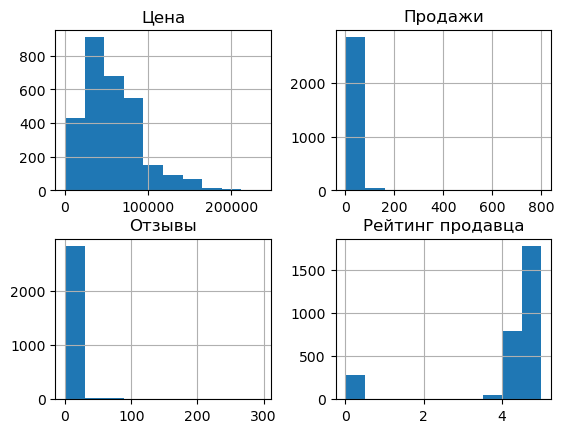

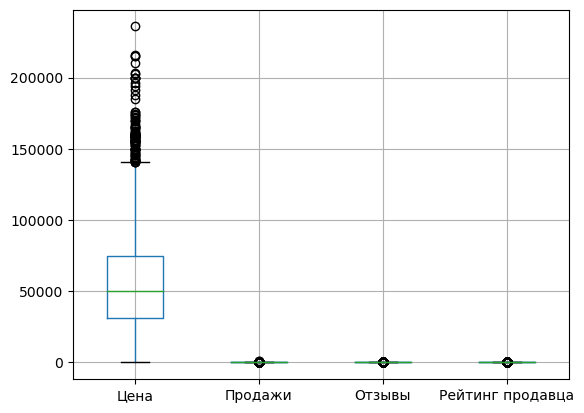

In [12]:
df.hist()
plt.show()

df.boxplot()
plt.show()

## Анализ взаимосвязи числовых признаков

## Выбор критериев и учет их ограничений

Критерий корреляции Пирсона тербует нормальности распределений обеих величин, однако у нас нормальное распределение имеет только цена, так что данный критерий не допустим к применению, однако мы посмотрим на его результаты дабы удостовериться в их неверности. В нашем случае лучше подойдет критерий Спирмена, ибо он работает и для не нормальных распределений, однако требует маленький размер выборки ($n<=40$). Учтем это.

## Постановка гипотез

Начнем с взаимосвязи между продажами и отзывами. За нулевую гипотезу примем то, что данные величины связаны: $H_0$: 'продажи и отзывы взаимосвязаны'. Альтернативная гипотеза, соответственно, $H_1$: 'продажи и отзывы **не** взаимосвязаны'. 

Для остальных всевозможных пар числовых величин гипотезы построим аналогично.
За уровень значимости возьмем $0.05$.

## Проведение тестирования

In [157]:
# Анализ взаимосвязей

# Маленькая подвыборка для Спирмена
small_sample = df.sample(40)

# Корреляционные матрицы
print('Корреляционная матрица по Пирсону:\n')
print(df.corr(numeric_only=True), end='\n\n')

print('Корреляционная матрица по Спирмену:\n')
print(small_sample.corr(method='spearman', numeric_only=True), end='\n\n')

# Отдельно прогоняем каждые признаки друг с другом
print('Критерий Пирсона:\n')
for label1 in df.loc[:, ['Цена', 'Продажи', 'Отзывы', 'Рейтинг продавца']].columns:
    for label2 in df.loc[:, ['Цена', 'Продажи', 'Отзывы', 'Рейтинг продавца']].columns:
        if label1 == label2:
            continue
        print(f'Значение критерия корреляции Пирсона для {label1} и {label2}')
        res = scps.pearsonr(df[label1], df[label2] )
        if res.pvalue > 0.05:
            print(res, ' не пройден уровень значимости!\n')
        else:
            print(res, '\n')

print('\nКритерий Спирмена:\n')      
for label1 in df.loc[:, ['Цена', 'Продажи', 'Отзывы', 'Рейтинг продавца']].columns:
    for label2 in df.loc[:, ['Цена', 'Продажи', 'Отзывы', 'Рейтинг продавца']].columns:
        if label1 == label2:
            continue
        print(f'\nЗначение критерия корреляции Спирмена для {label1} и {label2}')
        res = scps.spearmanr(small_sample[label1], small_sample[label2] )
        if res.pvalue > 0.05:
            print(res, ' не пройден уровень значимости!\n')
        else:
            print(res, '\n')

        

Корреляционная матрица по Пирсону:

                      Цена   Продажи    Отзывы  Рейтинг продавца
Цена              1.000000 -0.114933 -0.107257          0.055798
Продажи          -0.114933  1.000000  0.465488          0.016136
Отзывы           -0.107257  0.465488  1.000000          0.069354
Рейтинг продавца  0.055798  0.016136  0.069354          1.000000

Корреляционная матрица по Спирмену:

                      Цена   Продажи    Отзывы  Рейтинг продавца
Цена              1.000000  0.237330  0.080093          0.544909
Продажи           0.237330  1.000000  0.800082          0.451505
Отзывы            0.080093  0.800082  1.000000          0.357712
Рейтинг продавца  0.544909  0.451505  0.357712          1.000000

Критерий Пирсона:

Значение критерия корреляции Пирсона для Цена и Продажи
PearsonRResult(statistic=-0.11493338112223933, pvalue=5.354930992083627e-10) 

Значение критерия корреляции Пирсона для Цена и Отзывы
PearsonRResult(statistic=-0.10725726251126624, pvalue=6.9885800881

## Результаты и выводы

Критерии корреляции Спирмена показали следующее (из-за маленького размера выборки зачастую тест не проходил необходимый уровень значимости, так что будет проводить тестирование до тех пор, пока не будет выявлен достоверный результат): 
- Cлабая отрицательная корреляция между ценой товара и количеством продаж (из контекста можно сделать следующий вывод: дешевые товары чаще покупают, однако взаимосвязь не слишком сильная)
- Аналогичная ситуация ценой и количеством отзывов (то есть на дешевые товары чаще оставляют отзывы)
- Однако цена и рейтинг продавца никак не связаны (корреляция очень слабая)
- Количество продаж и количество отзывов на товаре имеют слабую положительную корреляцию (тут нельзя однозначно сказать что от чего зависит: с одной стороны товары с большим количеством отзывов охотнее покупают, с другой же стороны, отзывы чаще оставляют люди, купившие товар)
- Рейтинг продавца и количество продаж имеют положительную корреляцию (очевидно, у продавца с высоким рейтингом больше покупают товар)
- Количество отзывов на товаре и рейтинг продавца имеют слабую положительную корреляцию

Сила корреляции определяется по табличке снизу, а её направление по знаку коэффициента.

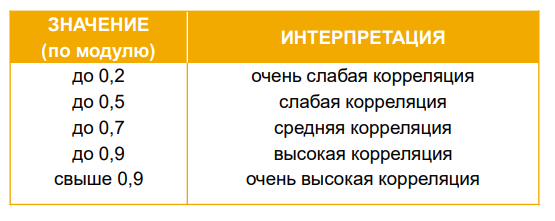

Также по результатам тестирования видно, что критерий Пирсона неверен, что подтверждает его непригодность для не нормальных распределений.

Как итог,у пар величин, у которых имеется хотя бы слабая корреляция, выполняется нулевая гипотеза $H_0$, у остальных пар нулевая гипотеза отвергается и принимается альтернативная $H_1$. 

## Графическое представление результатов

Из-за высокой непостоянности критерия Спирмена тепловая карта будет местами неправдива (часто значение не попадает в уровень значимости), однако графики зависимости признаков наглядно демонстрируют достоверность наших выводов.

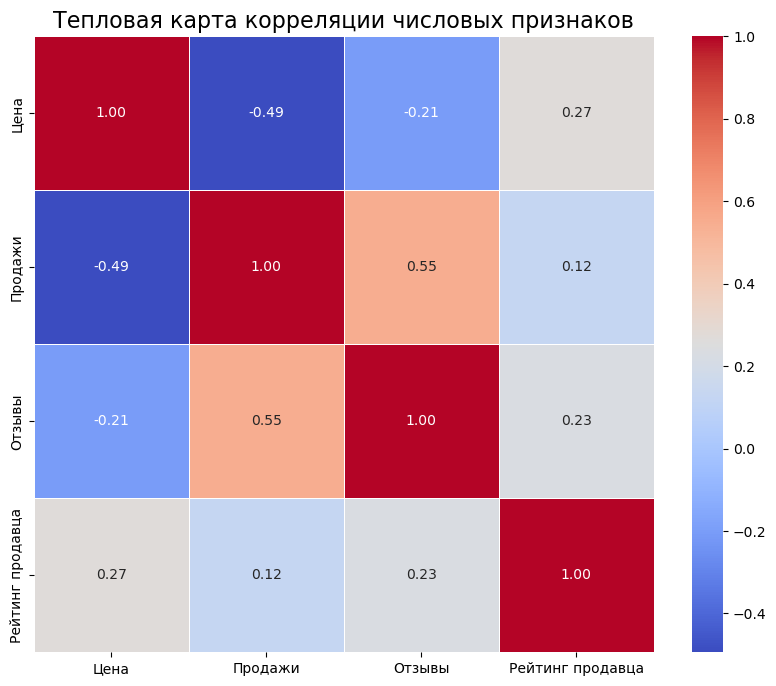

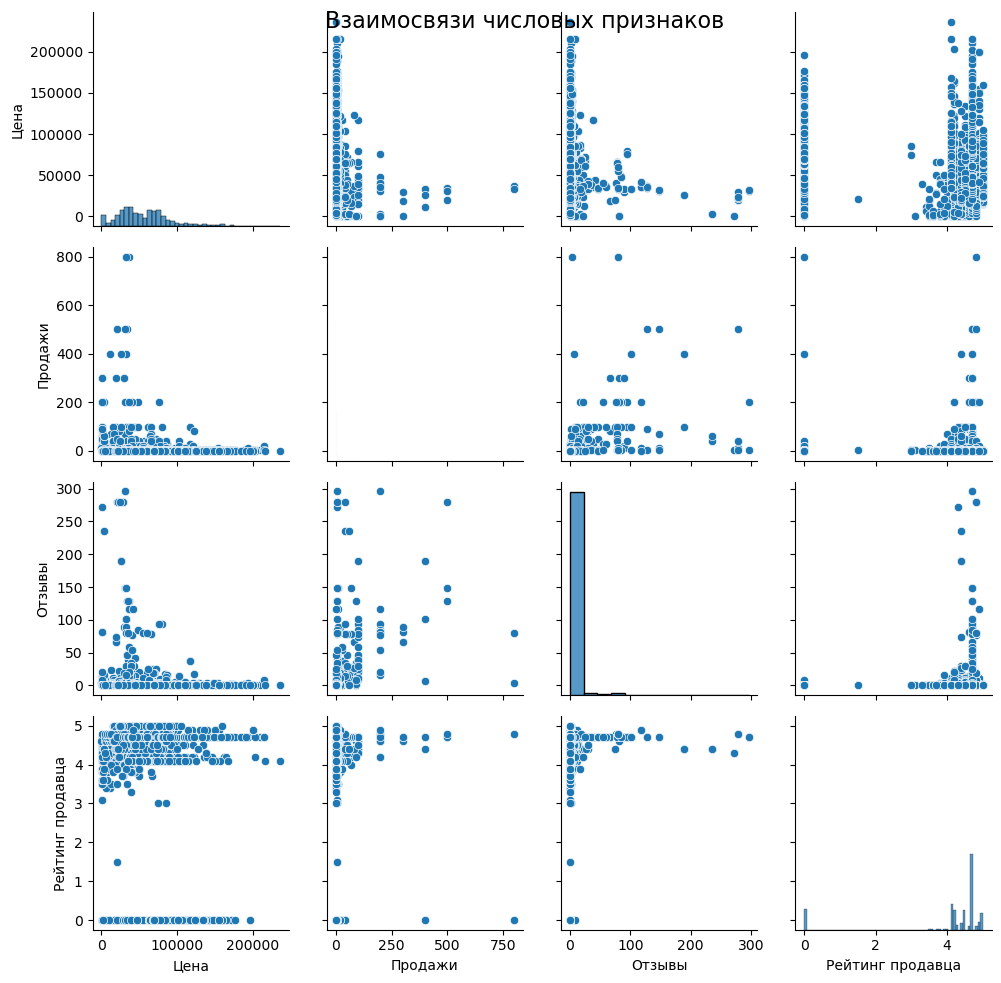

In [59]:
# Тепловая карта корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(df.sample(40).corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Тепловая карта корреляции числовых признаков", fontsize=16)
plt.show()

# PairGrid для визуализации взаимосвязей между числовыми признаками
g = sns.PairGrid(df.select_dtypes(include=np.number))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.suptitle("Взаимосвязи числовых признаков", fontsize=16)
plt.show()


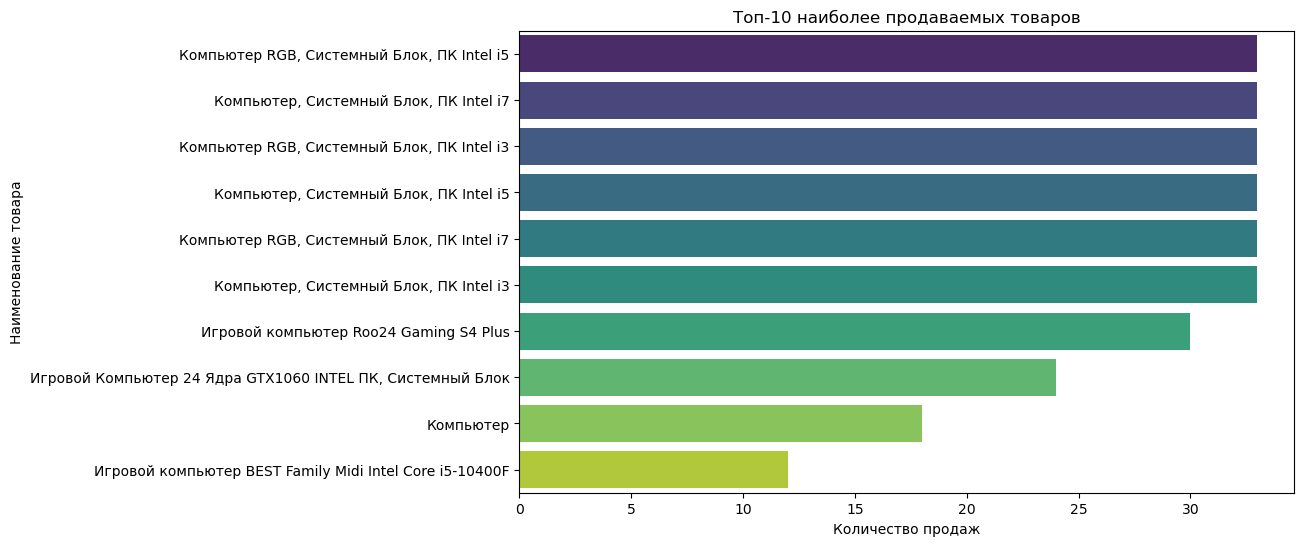

Количество Название:
Компьютер RGB, Системный Блок, ПК Intel i5                                                        33
Компьютер, Системный Блок, ПК Intel i7                                                            33
Компьютер RGB, Системный Блок, ПК Intel i3                                                        33
Компьютер, Системный Блок, ПК Intel i5                                                            33
Компьютер RGB, Системный Блок, ПК Intel i7                                                        33
                                                                                                  ..
Компьютер TC-1660 CI3-10105 DG.BGZER.005                                                           1
Компьютер ACER Aspire DG.BGZER.004                                                                 1
Мини компьютер, Beelink Mini S, 16/256Гб                                                           1
Настольный компьютер Chip computers Medium4. Проц.A6-9500E, чипсет B35

In [14]:
# Анализ категориальных признаков

# Наиболее популярные товары
top_products = df['Название'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products, y=top_products.index, palette='viridis')
plt.xlabel('Количество продаж')
plt.ylabel('Наименование товара')
plt.title('Топ-10 наиболее продаваемых товаров')
plt.show()


# Количество элементов каждой колонки
categorical_columns = df.select_dtypes(include=[object])
for column in categorical_columns:
    print(f"Количество {column}:")
    print(df[column].value_counts())
    print()


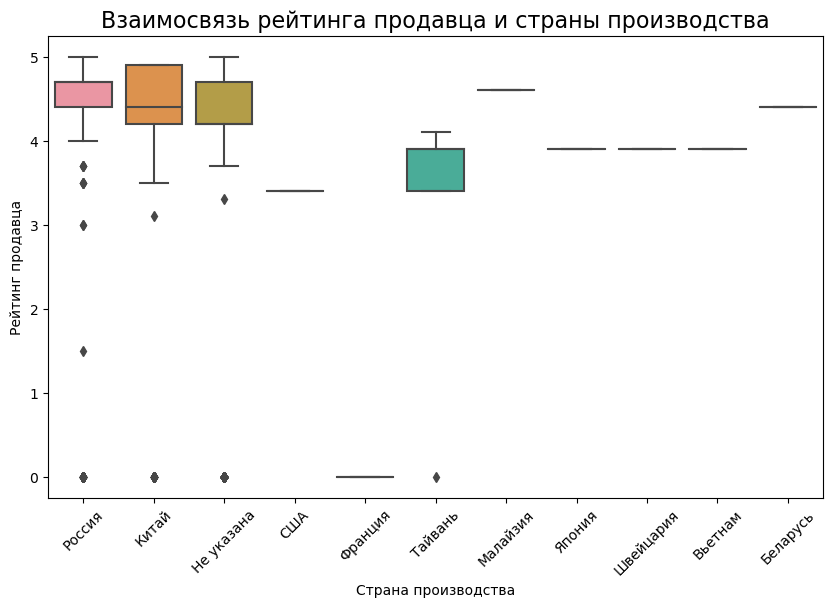

In [42]:
# Boxplot для анализа взаимосвязи рейтинга продавца и страны производства
plt.figure(figsize=(10, 6))
sns.boxplot(x='Страна производства', y='Рейтинг продавца', data=df)
plt.xticks(rotation=45)
plt.title("Взаимосвязь рейтинга продавца и страны производства", fontsize=16)
plt.show()

In [17]:
# Срез данных по определенным условиям

print('Название товаров, цена которых больше 50_000Р по возрастанию цены.')
print(df[df['Цена'] > 50_000].loc[:, ['Название', 'Цена']].sort_values('Цена'))

Название товаров, цена которых больше 50_000Р по возрастанию цены.
                                               Название      Цена
683      Игровой Компьютер Robotcomp Старт V3 Plus 1650   50049.0
2213  Игровой компьютер Системный блок ПК CompDay Козак   50049.0
2239  Игровой компьютер Системный блок ПК CompDay Ле...   50049.0
2318  Игровой компьютер Системный блок ПК CompDay Це...   50095.0
2383  Игровой компьютер Системный блок ПК CompDay Varan   50095.0
...                                                 ...       ...
1239               Мощный игровой компьютер Зевс 2.0 V2  209955.0
1242               Мощный игровой компьютер Зевс 2.0 V3  214954.0
1241               Мощный игровой компьютер Зевс 2.0 V3  214954.0
4034  Игровой компьютер AMD Ryzen 9 7900X, RTX 3080,...  215900.0
4053  Игровой компьютер i7 13700KF, RTX 4070 Ti 12GB...  235900.0

[1463 rows x 2 columns]


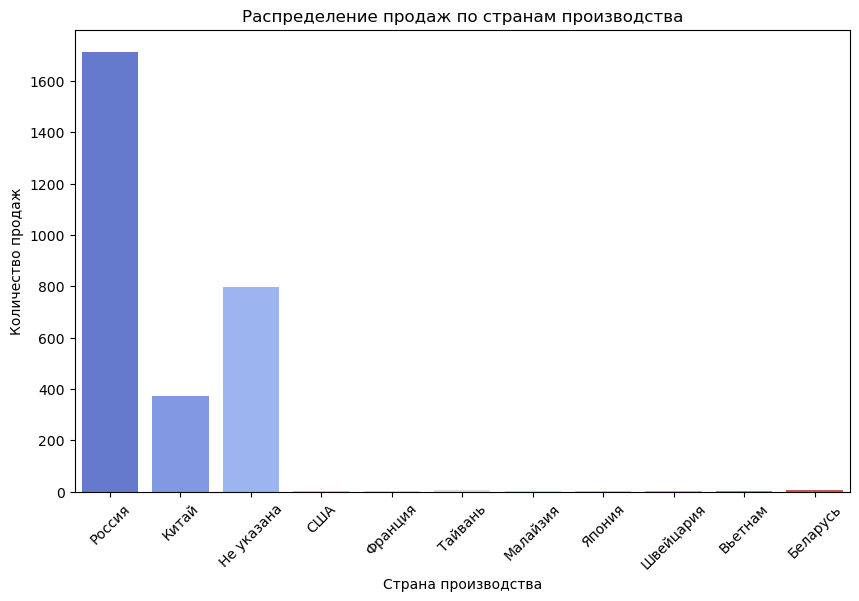

In [240]:

# Распределение продаж по странам производства
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Страна производства', palette='coolwarm')
plt.xlabel('Страна производства')
plt.ylabel('Количество продаж')
plt.title('Распределение продаж по странам производства')
plt.xticks(rotation=45)
plt.show()

## Взаимосвязь категориальных и числовых признаков

### Выбор критериев и учет их ограничений

Ранее была установлена кореляция числовых признаков. Было выявлено, что цена является ключевым фактором: меньше цена - больше продаж и отзывов. Однако не было выявлено взаимосвязи цены и страны производства ПК. Так как стран-производителей кроме Китая и России несоизмеримо мало, то остановимся на данных двух странах. Для проверки выберем t-критерий Стьюдента, так как цена имеет нормальное распределение. Однако стоит помнить о необходимости равенства дисперсий двух выборок, но на этот случай есть модификация критерий Уэлча, которую мы и примемим при необходимости.

### Постановка гипотез

За нулевую гипотезу примем совпадение величин ожидаемого среднего распределений цены компьютеров из Китая и из России, а за альтернативную их несовпадение соответственно:\begin{equation} H_0: \mu_1 = \mu_2 \\ H_1: \mu_1 \ne \mu_2 \end{equation}
За уровень значимости по традиции берем $0.05$ :D.

### Проведение тестирования

In [251]:
# Делаем подвыборки цен из России и из Китая
rus_prices = df[df['Страна производства'] == 'Россия']['Цена']
chn_prices = df[df['Страна производства'] == 'Китай']['Цена']

# Проверка на равенство дисперсий
print(rus_prices.var())
print(chn_prices.var())

peremennaya = scps.ttest_ind(rus_prices, chn_prices, equal_var=False)
# Проводим непосредственное тестирование (equal_var=False ибо дисперсии различаются)
print(peremennaya)

# Проверям попадает ли значение статистики в доверительный интервал в 95%
print(peremennaya.confidence_interval(confidence_level=0.95) )

1168212280.2077096
1772289683.8842282
TtestResult(statistic=7.667253278161262, pvalue=9.70267558985636e-14, df=484.21375069536845)
ConfidenceInterval(low=13291.578497743423, high=22451.368965350295)


### Результаты и вывод

Тест показал значение статистики в $7.667$, которое не попадает в доверительный интервал, исходя из чего мы можем отвергнуть нулевую гипотезу $H_0$ и принять альтернативную, которая говорит о том, что средние значения цен ПК из Китая и России отличаются. Проверим насколько и в какую сторону.

In [253]:
print(rus_prices.mean())
print(chn_prices.mean())

56793.46032672112
38921.98659517426


Можем заметить, что ПК из Китая сильно дешевле, что, учитывая выводы выше, поддталкивает нас на рассмотрение данной страны в качестве основного поставщика.

# Оценка результатов

## Итог

- Цены распределены нормально, остальные количественные признаки - нет
- Низкие цены положительно влияют на количество продаж и отзывов на товары, которые в свою очередь увеличивают рейтинг продавца и количество продаж еще больше
- Сборки и комплектующие дешевле в Китае

## Рекомендации

Низкие цены значительно влияют на количетсво продаж, которые в свою очередь повышают количество отзывов и выводят продавца в топы площадки - первое время стоит держаться в низкой ценовой категории для наращивания оборотов и приобретения лояльной базы покупателей. Для большей экономии стоит присмотреться к производителям из Китая - их комплектующие на $30$% дешевле отечественных, при этом рынок остальных стран имеет крайне низкий спрос.